ep1

In [1]:
# libraries
using Plots

In [2]:
# Create an array with N points
xmin = ymin = -1
xmax = ymax = 2

X = [1.3 -0.2;     # cada linha equivale a um ponto
    0 0;
    0 1;
    1 0;
    1 1]

display(X)
println("Shape of array X: ", size(X))

N = size(X)[1]
println("Number of examples: ", N)


5×2 Array{Float64,2}:
 1.3  -0.2
 0.0   0.0
 0.0   1.0
 1.0   0.0
 1.0   1.0

Shape of array X: (5, 2)
Number of examples: 5


In [3]:
# add X leftmost column with 1's
add_column_of_ones(X) = hcat(ones(N), X)

Xe = add_column_of_ones(X)
display(Xe)
println("Shape of array Xe: ", size(Xe))


5×3 Array{Float64,2}:
 1.0  1.3  -0.2
 1.0  0.0   0.0
 1.0  0.0   1.0
 1.0  1.0   0.0
 1.0  1.0   1.0

Shape of array Xe: (5, 3)


In [4]:
# define a target weight vector
w_target = [0.5; -1; 1]
display(w_target)
println("Shape of array w_target: ", size(w_target))


3-element Array{Float64,1}:
  0.5
 -1.0
  1.0

Shape of array w_target: (3,)


In [5]:
# define y (class) values, based on the line defined by the target weight vector
y = Xe * w_target            # produto matricial (crossproduct)
#display(y)

y = sign.(Xe * w_target)     # sign broadcasted
display(y)
println("Shape of array y: ", size(y))


5-element Array{Float64,1}:
 -1.0
  1.0
  1.0
 -1.0
  1.0

Shape of array y: (5,)


["red", "blue", "blue", "red", "blue"]


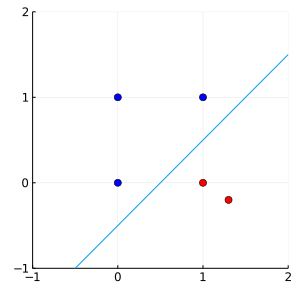

In [6]:
# plot the line
a = -w_target[2] / w_target[3] # slope
b = -w_target[1] / w_target[3] # intercept
x_l = range(xmin, xmax; length=50)
y_l = a * x_l .+ b

gr()
plot(x_l, y_l, lims=(xmin, xmax), size=(300,300), legend=false)

# plot the data points
colors = map( (y -> y == 1 ? "blue" : "red") , y )
println(colors)
scatter!(X[:, 1], X[:, 2], markercolor = colors)

Color the classification: blue (positive) and red (negative)

Mark data points: dot (correct classification) and cross (incorrect classification)

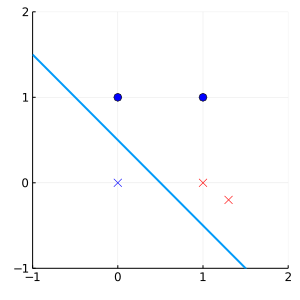

In [7]:
function plot_state(Xe, w, xmin, xmax, ymin, ymax)
    ŷ = sign.(Xe * w)                 # predict classification
    correct = (y .== ŷ)               # vector of correct classification data
    misclassified = (y .!= ŷ)         # vector of misclassified data
    
    colors_o = [y[i]==1 ? "blue" : "red" for i in findall(correct)]
    colors_x = [y[i]==1 ? "blue" : "red" for i in findall(misclassified)]
    
    #ploting perceptron line
    a = -w[2] / w[3] # slope
    b = -w[1] / w[3] # intercept
    x_l = range(xmin, xmax; length=50)
    y_l = a * x_l .+ b
    gr()
    plot(x_l, y_l, lims=(xmin, xmax), size=(300,300), linewidth = 2, legend=false)
    
    #plotting data
    scatter!(X[correct, 1],       X[correct, 2],       markershape = :o, markercolor = colors_o)
    scatter!(X[misclassified, 1], X[misclassified, 2], markershape = :x, markercolor = colors_x, msalpha = 1)
end

#w0 = [0.5; -1; 1]
w0 = [-0.5; 1; 1]

plot_state(Xe, w0, xmin, xmax, ymin, ymax)

In [11]:
function perceptron(Xe, y, w0, plot=false)
    w = copy(w0)
    
    while true
        ŷ = sign.(Xe * w)
        correct = (y .== ŷ)
        misclassified = (y .!= ŷ)
        
        display(size(misclassified)[1])
        if size(misclassified)[1]==0
            break
        end
        
        # w(t+1) = w(t) + y(t) * x(t)
        display(y)
        display(Xe)
        w = w + y * Xe
        
        break

    end
end
    
perceptron(Xe, y, w0)

5

5-element Array{Float64,1}:
 -1.0
  1.0
  1.0
 -1.0
  1.0

5×3 Array{Float64,2}:
 1.0  1.3  -0.2
 1.0  0.0   0.0
 1.0  0.0   1.0
 1.0  1.0   0.0
 1.0  1.0   1.0

DimensionMismatch: [91mDimensionMismatch("A has dimensions (5,1) but B has dimensions (5,3)")[39m